In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Run again with validation split at 0.2

In [44]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn161

In [45]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.RANDOM,pad=4)

In [46]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [47]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.trn_dl))


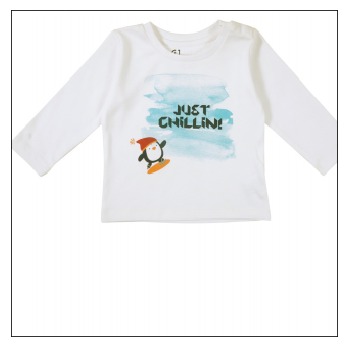

In [ ]:
show_img(data.trn_ds.denorm(to_np(x))[5],figsize=(6,6))

In [ ]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2,opt_fn=optim.Adagrad)

  2%|▏         | 30/1709 [00:25<23:45,  1.18it/s] 

In [ ]:
lrf = learn.lr_find()
learn.sched.plot()

In [12]:
lr = 0.002
learn.fit(lr,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 42%|████▏     | 713/1709 [00:09<00:13, 72.36it/s, loss=1.23]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.092121   1.042158   0.700935  
    1      0.985204   0.985586   0.713201                      
    2      0.979123   0.958966   0.720648                      



[0.95896614, 0.72064836448598135]

In [13]:
learn.fit(lr,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.895348   0.940663   0.724007  
    1      0.906316   0.926788   0.727585                      
    2      0.854781   0.916839   0.73014                       



[0.91683877, 0.73014018691588789]

In [14]:
learn.fit(lr,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.862346   0.909099   0.732258  
    1      0.817061   0.903905   0.737661                      
    2      0.745108   0.896192   0.736127                      



[0.89619219, 0.73612733644859818]

In [15]:
learn.fit(lr/2,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.782764   0.892499   0.73715   
    1      0.772653   0.886421   0.738756                      
    2      0.782185   0.890339   0.735543                      



[0.89033943, 0.73554322429906538]

In [16]:
learn.fit(lr/5,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.761159   0.882027   0.738829  
    1      0.750759   0.880566   0.741238                      
    2      0.7216     0.883148   0.739559                      



[0.88314772, 0.73955899532710279]

In [17]:
learn.save('f-myntra-201-adagrad')

In [18]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 116    3    0    0    2   14   23   36   80    0   11    0   33    0    0   37    2    0   13    7    4
     0   73    0]
 [   2   65    0    0    0    1    0    0   16    0    0    0    6    0    0    1    0    0    0    1    0
     0   32    0]
 [   7    1   19    0    0    0    2    0    4    0    0    0    0    0    0    2    0    0    1    0    0
     0    9    0]
 [   0    0    0   26    0    0    0    4    0    0    0    0    0    0    0    9    0    0    6    0    0
     0    1    0]
 [   1    0    0    0  282    1    0    3    3    0    1    0    0    0    0  163    0    0   30    0    1
     0   28    0]
 [  14    0    0    0    1  127   15   20   36    0   11    0    0    0    0   10    0    0    2    3    0
     0   33    0]
 [  20    0    0    0    0   11  179    5   36    0    2    0    5    0    0   14    0    0    2    0    0
     0   33    0]
 [  28    0    1    2    5   21    4  193   30    0    0    0    1    0    1   

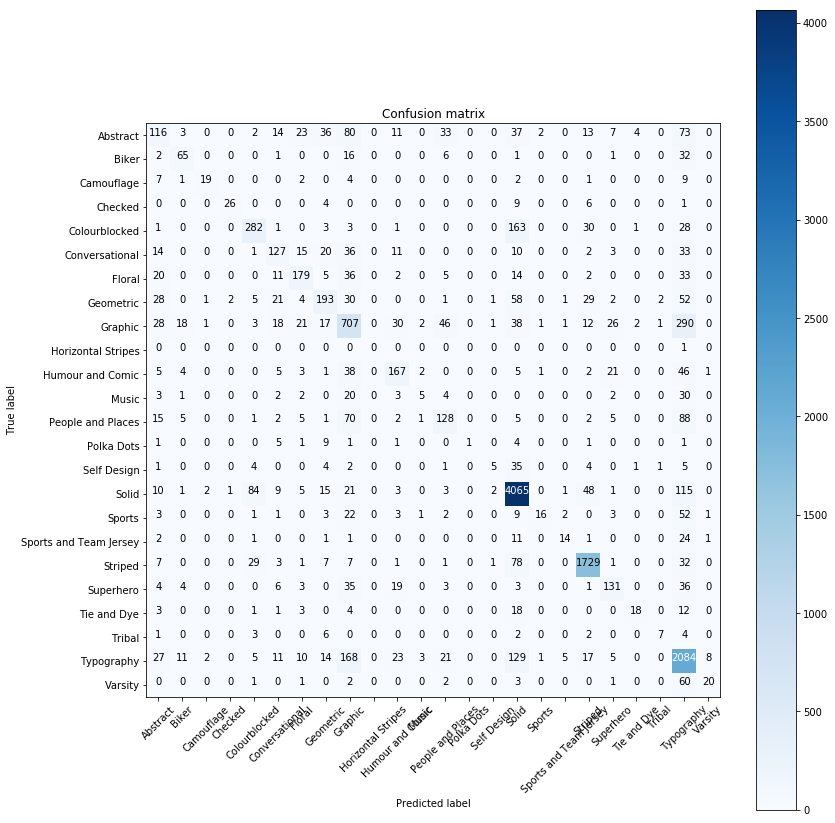

In [19]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.25551  0.00661  0.       0.       0.00441  0.03084  0.05066  0.0793   0.17621  0.       0.02423  0.
   0.07269  0.       0.       0.0815   0.00441  0.       0.02863  0.01542  0.00881  0.       0.16079  0.     ]
 [ 0.01613  0.52419  0.       0.       0.       0.00806  0.       0.       0.12903  0.       0.       0.
   0.04839  0.       0.       0.00806  0.       0.       0.       0.00806  0.       0.       0.25806  0.     ]
 [ 0.15556  0.02222  0.42222  0.       0.       0.       0.04444  0.       0.08889  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.02222  0.       0.       0.       0.2      0.     ]
 [ 0.       0.       0.       0.56522  0.       0.       0.       0.08696  0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.13043  0.       0.       0.       0.02174  0.     ]
 [ 0.00195  0.       0.       0.       0.54971  0.00195  0.       0.00585  0.00585  0.       0.00195  0.    

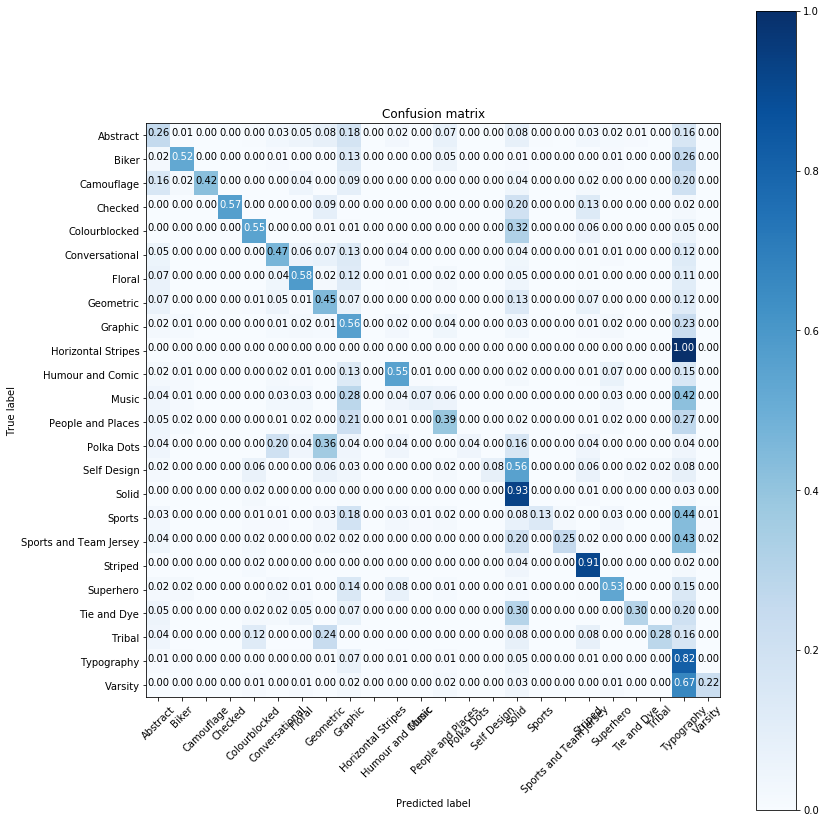

In [20]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [21]:
arch_201=dn201

In [22]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [23]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [24]:
learn_201 = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2,opt_fn=optim.Adadelta)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.442245   1.708937   0.557754  



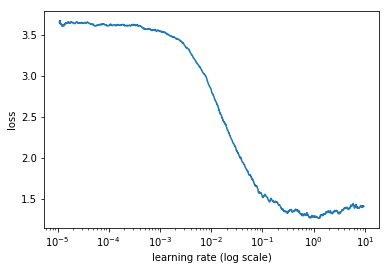

In [25]:
lrf = learn_201.lr_find()
learn_201.sched.plot()

In [26]:
learn_201.fit(0.05,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.128182   1.035332   0.706119  
    1      0.992222   0.968103   0.72094                       
    2      0.950067   0.936261   0.725029                      
    3      0.857262   0.915224   0.733134                      
    4      0.824581   0.902632   0.736054                      



[0.9026323, 0.73605432242990654]

In [27]:
lr = 0.01

In [28]:
learn_201.fit(lr,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.819632   0.893292   0.737953  
    1      0.775891   0.88721    0.737515                      



[0.88720989, 0.73751460280373837]

In [29]:
learn_201.fit(lr/5,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.740077   0.891165   0.739048  
    1      0.762968   0.884692   0.739778                      
    2      0.738596   0.885377   0.740581                      
    3      0.731467   0.885151   0.740435                      
    4      0.756836   0.885579   0.742188                      



[0.88557947, 0.7421875]

In [30]:
learn_201.save('f-myntra-201-adadelta')

In [31]:
log_preds_201,y_201 = learn_201.TTA()
probs_201 = np.mean(np.exp(log_preds_201),0)
accuracy_np(probs_201, y_201)
y_201[10]=9
predictions_201 = np.argmax(probs_201,axis=1)
cm_201 = confusion_matrix(y_201, predictions_201)


Confusion matrix, without normalization
[[ 127    3    0    0    5   13   22   29   81    0   10    0   35    0    0   39    2    0   18    6    4
     1   59    0]
 [   2   65    0    0    0    1    2    0   12    0    1    0    6    0    0    1    0    0    0    1    1
     0   32    0]
 [   4    0   20    0    1    0    3    0    5    0    0    0    0    0    0    3    0    0    2    0    0
     0    7    0]
 [   2    0    0   24    0    0    0    5    0    0    0    0    0    0    0    9    0    0    5    0    0
     0    1    0]
 [   3    0    0    0  286    1    0    5    3    0    0    0    0    0    0  160    0    0   30    0    1
     0   24    0]
 [  13    0    0    0    1  117   19   25   38    0    7    0    3    0    0   11    0    0    1    2    0
     0   35    0]
 [  20    0    0    0    2    8  192    7   30    0    2    0    6    0    0   15    0    0    1    0    0
     0   24    0]
 [  29    0    2    3    5   19   11  203   22    0    0    0    1    0    0   59    

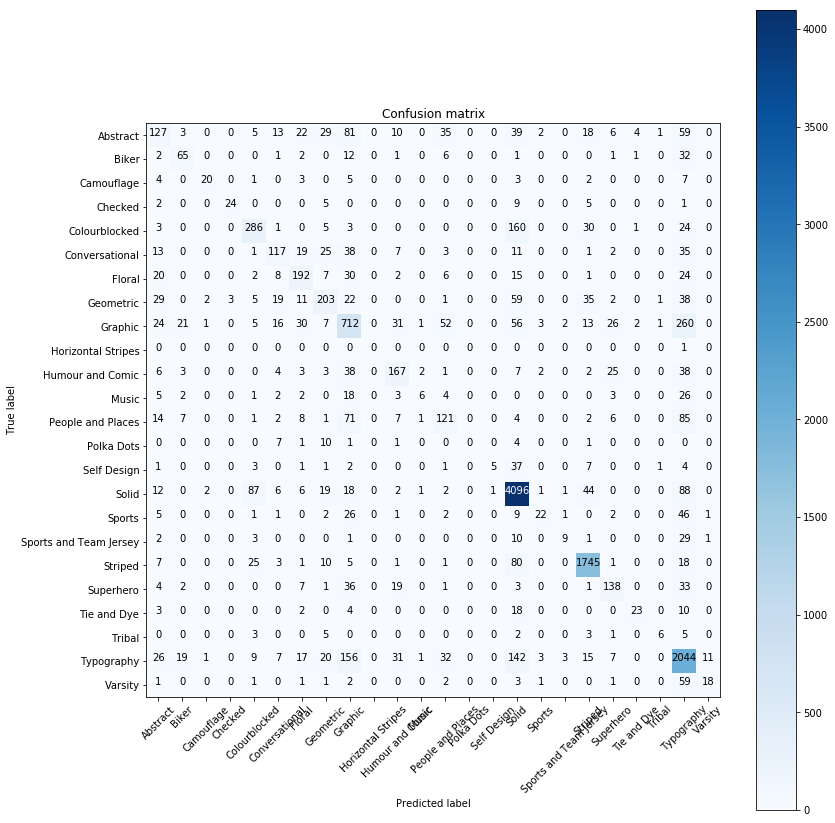

In [32]:
plot_confusion_matrix_mine(cm_201,data.classes,normalize=False)

In [33]:
probs_ensemble = probs_201 + probs

In [34]:
probs_ensemble[:2]

array([[ 0.00361,  0.00035,  0.0005 ,  0.00021,  0.00079,  0.0094 ,  0.00348,  0.01426,  0.00572,  0.00011,
         0.00114,  0.00056,  0.00042,  0.00069,  0.00419,  1.88497,  0.00141,  0.0002 ,  0.00144,  0.00126,
         0.00087,  0.00057,  0.05886,  0.005  ],
       [ 0.00352,  0.00074,  0.00129,  0.00021,  0.00779,  0.02031,  0.0062 ,  0.00913,  0.0075 ,  0.00015,
         0.02349,  0.00276,  0.00352,  0.0006 ,  0.00829,  1.81429,  0.0012 ,  0.00019,  0.02119,  0.00686,
         0.00439,  0.00096,  0.04859,  0.00684]], dtype=float32)

In [35]:
probs_ensemble = probs_ensemble/2

In [36]:
probs_ensemble[:2]

array([[ 0.0018 ,  0.00018,  0.00025,  0.0001 ,  0.00039,  0.0047 ,  0.00174,  0.00713,  0.00286,  0.00005,
         0.00057,  0.00028,  0.00021,  0.00034,  0.00209,  0.94248,  0.00071,  0.0001 ,  0.00072,  0.00063,
         0.00044,  0.00029,  0.02943,  0.0025 ],
       [ 0.00176,  0.00037,  0.00065,  0.0001 ,  0.0039 ,  0.01015,  0.0031 ,  0.00457,  0.00375,  0.00008,
         0.01174,  0.00138,  0.00176,  0.0003 ,  0.00415,  0.90714,  0.0006 ,  0.0001 ,  0.0106 ,  0.00343,
         0.00219,  0.00048,  0.0243 ,  0.00342]], dtype=float32)

In [37]:
accuracy_np(probs_ensemble, y)


0.74312262218320169

In [38]:
accuracy_np(probs,y)

0.73924495171202809

In [39]:
accuracy_np(probs_201,y_201)

0.74231782265144863

In [40]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [41]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 120    5    0    0    4   13   21   33   80    0   11    0   35    0    0   36    3    0   16    6    4
     0   67    0]
 [   2   65    0    0    0    1    1    0   14    0    1    0    5    0    0    1    0    0    0    1    0
     0   33    0]
 [   4    1   21    0    1    0    3    0    4    0    0    0    0    0    0    2    1    0    1    0    0
     0    7    0]
 [   1    0    0   25    0    0    0    5    0    0    0    0    0    0    0    9    0    0    5    0    0
     0    1    0]
 [   4    0    0    0  281    1    0    5    4    0    0    0    0    0    0  164    0    0   30    0    1
     0   23    0]
 [  13    0    0    0    1  122   18   23   39    0    8    0    1    0    0   10    0    0    1    3    0
     0   33    0]
 [  21    0    0    0    1    9  186    5   33    0    2    0    6    0    0   14    0    0    2    0    0
     0   28    0]
 [  26    0    2    2    5   18    8  200   29    0    0    0    0    0    1   58    

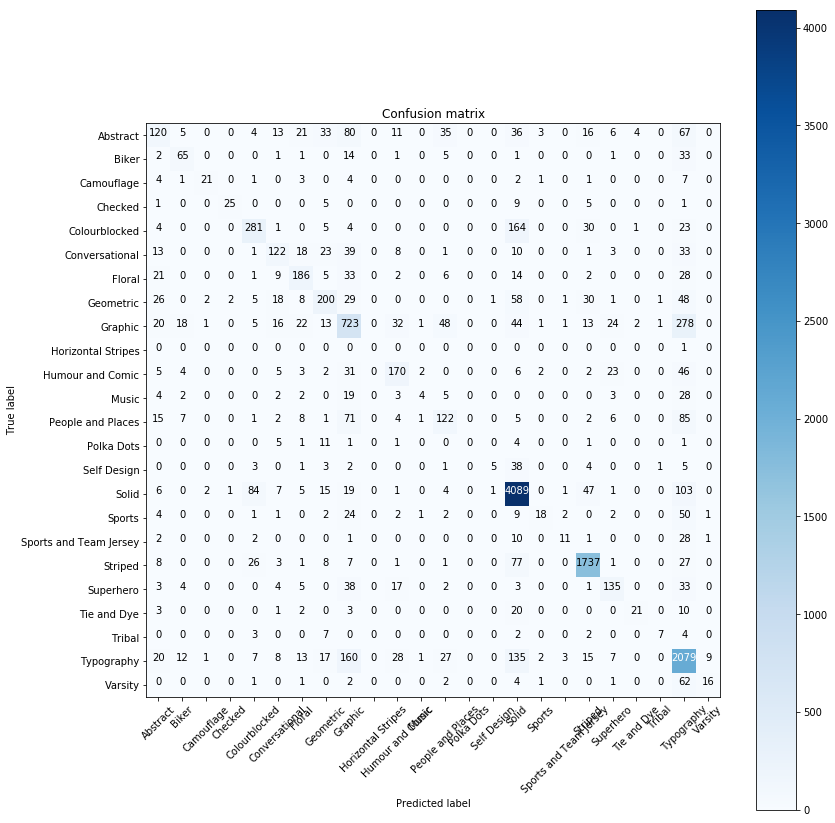

In [42]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.26432  0.01101  0.       0.       0.00881  0.02863  0.04626  0.07269  0.17621  0.       0.02423  0.
   0.07709  0.       0.       0.0793   0.00661  0.       0.03524  0.01322  0.00881  0.       0.14758  0.     ]
 [ 0.01613  0.52419  0.       0.       0.       0.00806  0.00806  0.       0.1129   0.       0.00806  0.
   0.04032  0.       0.       0.00806  0.       0.       0.       0.00806  0.       0.       0.26613  0.     ]
 [ 0.08889  0.02222  0.46667  0.       0.02222  0.       0.06667  0.       0.08889  0.       0.       0.       0.
   0.       0.       0.04444  0.02222  0.       0.02222  0.       0.       0.       0.15556  0.     ]
 [ 0.02174  0.       0.       0.54348  0.       0.       0.       0.1087   0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.1087   0.       0.       0.       0.02174  0.     ]
 [ 0.0078   0.       0.       0.       0.54776  0.00195  0.       0.00975  0.0078   0.       0.       0.    

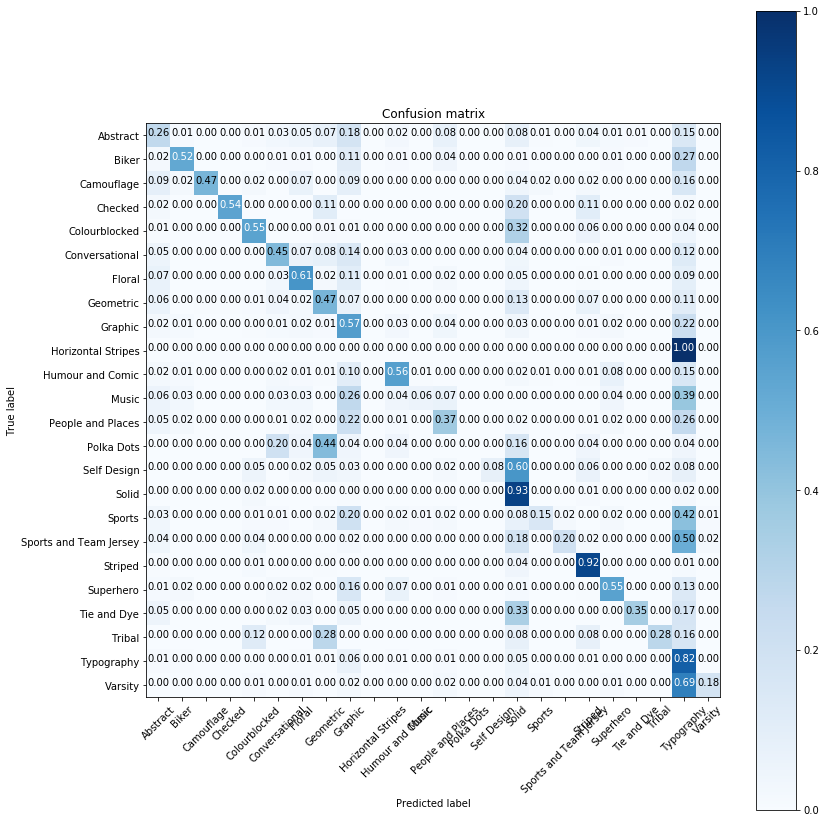

In [43]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [ ]:
learn.unfreeze()

In [ ]:
learn_201.unfreeze()

In [ ]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [ ]:
test = open_image(fname)
test= val_tfms((test))
test.shape

In [ ]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

In [ ]:
data.classes[np.argmax(pred_temp[0,:])]

In [ ]:
pred_temp_201 = learn_201.predict_array(test[None])
pred_temp_201 = np.exp(pred_temp_201)
pred_temp_201

In [ ]:
data.classes[np.argmax(pred_temp_201[0,:])]

In [ ]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [ ]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [ ]:
df.head()

In [ ]:
arch=resnext50
learn_resnext = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2,opt_fn=optim.Adagrad)

In [ ]:
lrf = learn_resnext.lr_find()
learn_resnext.sched.plot()

In [ ]:
learn_resnext.fit(0.0005,5)

In [ ]:
learn_resnext.fit(0.0002,20)

In [ ]:
learn_resnext.fit(0.005,2)

In [ ]:
learn_resnext.fit(0.001,5)

In [ ]:
learn_resnext.fit(0.0005,2)

In [ ]:
learn_resnext.fit(0.0001,2)

In [ ]:
learn_resnext.fit(0.0001,5)

In [ ]:
log_preds_resnext,y_resnext = learn_resnext.TTA()
probs_resnext = np.mean(np.exp(log_preds_resnext),0)
accuracy_np(probs_resnext, y_resnext)

In [ ]:
y_resnext[10]=9

In [ ]:
predictions_resnext = np.argmax(probs_resnext,axis=1)

In [ ]:
cm = confusion_matrix(y_resnext, predictions_resnext)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
ensemble_two = probs_resnext + probs + probs_201

In [ ]:
ensemble_two[:3]

In [ ]:
ensemble_two = ensemble_two/3

In [ ]:
accuracy_np(ensemble_two,y_resnext)

In [ ]:
predictions_ensemble_two = np.argmax(ensemble_two,axis=1)

In [ ]:
predictions_ensemble

In [ ]:
cm = confusion_matrix(y_resnext, predictions_ensemble)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [ ]:
learn_resnext.unfreeze()

In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two)/2
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

In [ ]:
df.to_csv('myntra-ensemble-two.csv',index=False)